In [1]:
## Data Preprocessing
import pandas as pd
import numpy as np

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Modeling
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn.model_selection import train_test_split, \
                                    cross_val_score, \
                                    GridSearchCV

## Find out execution time
from datetime import datetime

## Graph visualization
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('_inputs/A_exam.csv')

In [3]:
df.shape

(1000, 15)

In [4]:
df.head()

,A,B,C,F,G,H,I,J,K,L,Response,D,E,M,N
0,-139.183051,-1.060948,-0.097275,-0.365750,0.404934,-0.305241,-1.404708,0.337155,-1.592293,-0.103458,-0.456757,Male,Yes,-0.205713,-138.988001
1,29.485760,0.505301,2.554449,-1.150606,-1.136165,1.057958,0.605221,1.175852,-0.746916,1.747668,1.396062,Fema,Yes,1.892266,29.152263
2,-58.997366,0.345515,0.975520,-1.028006,-1.021109,0.281955,0.845064,-0.204924,-0.737706,0.852126,1.612660,Fema,Yes,1.080193,-58.942485
3,-337.510287,-0.535584,0.276812,0.547569,-0.625828,0.779547,-0.193539,-1.696172,-1.226760,-0.876860,-0.498703,Fema,Yes,-1.143868,-337.379225
4,-170.224848,1.288707,-0.454460,-0.638863,-1.486823,-0.525961,0.147493,-0.923201,-0.929357,-1.304802,1.186234,Fema,Yes,-1.611586,-169.823726


In [5]:
df = pd.get_dummies(df, columns=['D', 'E'], drop_first = True)
X = df.drop(columns=['Response'])
Y = df[['Response']]

In [6]:
X.head()

,A,B,C,F,G,H,I,J,K,L,M,N,D_Male,E_Yes
0,-139.183051,-1.060948,-0.097275,-0.365750,0.404934,-0.305241,-1.404708,0.337155,-1.592293,-0.103458,-0.205713,-138.988001,1,1
1,29.485760,0.505301,2.554449,-1.150606,-1.136165,1.057958,0.605221,1.175852,-0.746916,1.747668,1.892266,29.152263,0,1
2,-58.997366,0.345515,0.975520,-1.028006,-1.021109,0.281955,0.845064,-0.204924,-0.737706,0.852126,1.080193,-58.942485,0,1
3,-337.510287,-0.535584,0.276812,0.547569,-0.625828,0.779547,-0.193539,-1.696172,-1.226760,-0.876860,-1.143868,-337.379225,0,1
4,-170.224848,1.288707,-0.454460,-0.638863,-1.486823,-0.525961,0.147493,-0.923201,-0.929357,-1.304802,-1.611586,-169.823726,0,1


In [7]:
Y.head()

,Response
0,-0.456757
1,1.396062
2,1.612660
3,-0.498703
4,1.186234


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3)

# Decision Tree

In [9]:
np.linspace(1, 20, 20, endpoint=True)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [10]:
dt = DecisionTreeRegressor(random_state=42)

startTime = datetime.now()

param_grid = {
    'max_features': list(range(1,X_train.shape[1])),
    'max_depth' : np.linspace(1, 20, 20, endpoint=True),
#     'min_samples_split': np.linspace(0.1, 1.0, 5, endpoint=True),
#     'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)
}

CV_dt = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5)
CV_dt.fit(X_train, y_train)

print(CV_dt.best_params_)

print(datetime.now() - startTime)

{'max_depth': 2.0, 'max_features': 3}
0:00:21.063580


In [11]:
dt = DecisionTreeRegressor(
    max_features = 7,
    max_depth = 2,
#     min_samples_leaf = 0.1,
#     min_samples_split = 0.1
)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
pred = dt.predict(X_test)

dt_score = dt.score(X_test,y_test)
print('Score of decision tree classifier: ', dt_score)

Score of decision tree classifier:  0.011042294566768418


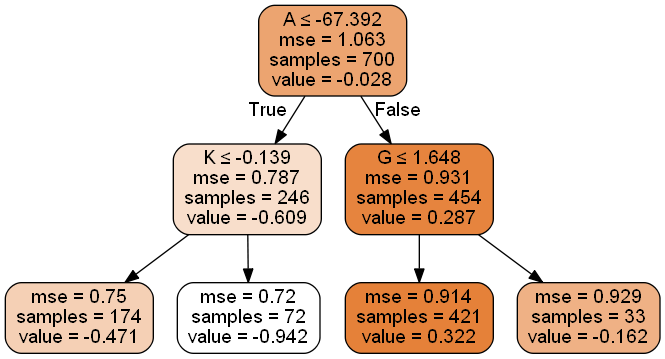

In [12]:
dot_data = StringIO()

export_graphviz(dt,
                out_file = dot_data,
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = X_train.columns.values
               )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [13]:
print(dict(zip(X.columns, dt.feature_importances_)))

{'A': 0.8738158806160359, 'B': 0.0, 'C': 0.0, 'F': 0.0, 'G': 0.048984445946756335, 'H': 0.0, 'I': 0.0, 'J': 0.0, 'K': 0.07719967343720775, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'D_Male': 0.0, 'E_Yes': 0.0}


# AdaBoost

In [14]:
score = np.array([])

startTime = datetime.now()

for i in [100, 150, 200, 250, 300]:
    for j in [0.001, 0.01, 0.1]:
        bc = ensemble.AdaBoostRegressor(DecisionTreeRegressor(), n_estimators = i, learning_rate=j)
        mod_cv = cross_val_score(bc, X_train, y_train, cv = 5)
        score = np.append(score, np.mean(mod_cv))
        print("n_estimators->", i, "learning_rate->", j, "Mean->", np.mean(mod_cv))

n_estimators-> 100 learning_rate-> 0.001 Mean-> 0.3370579914711425
n_estimators-> 100 learning_rate-> 0.01 Mean-> 0.3309191505283787
n_estimators-> 100 learning_rate-> 0.1 Mean-> 0.36135972934867067
n_estimators-> 150 learning_rate-> 0.001 Mean-> 0.3442934191434672
n_estimators-> 150 learning_rate-> 0.01 Mean-> 0.3435335763247299
n_estimators-> 150 learning_rate-> 0.1 Mean-> 0.35946148905322967
n_estimators-> 200 learning_rate-> 0.001 Mean-> 0.3334822138768483
n_estimators-> 200 learning_rate-> 0.01 Mean-> 0.354026232096098
n_estimators-> 200 learning_rate-> 0.1 Mean-> 0.3716023976418007
n_estimators-> 250 learning_rate-> 0.001 Mean-> 0.32764426630624266
n_estimators-> 250 learning_rate-> 0.01 Mean-> 0.3495013353831613
n_estimators-> 250 learning_rate-> 0.1 Mean-> 0.37470967801258226
n_estimators-> 300 learning_rate-> 0.001 Mean-> 0.333976789737107
n_estimators-> 300 learning_rate-> 0.01 Mean-> 0.3538891912989225
n_estimators-> 300 learning_rate-> 0.1 Mean-> 0.3828253096813347


In [15]:
Ada = ensemble.AdaBoostRegressor(DecisionTreeRegressor(), n_estimators = 100, learning_rate=0.001)

Ada = Ada.fit(X_train,y_train)

pred = Ada.predict(X_test)

Ada_score = Ada.score(X_test,y_test)
print('Score of AdaBoost classifier: ', Ada_score)

Score of AdaBoost classifier:  0.22391686004839662


In [16]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in Ada.estimators_
], axis=0)

print(dict(zip(X.columns, feature_importances)))

{'A': 0.17418903305176003, 'B': 0.05386023072113508, 'C': 0.04918907117358923, 'F': 0.04747608493644328, 'G': 0.08579595452489987, 'H': 0.04474389351506967, 'I': 0.0512811018577889, 'J': 0.11840344568452103, 'K': 0.12848371188887317, 'L': 0.029456341558788974, 'M': 0.030852565960212765, 'N': 0.14617130035863332, 'D_Male': 0.03972781143008616, 'E_Yes': 0.0003694533381984841}


# Best Model Selection

In [17]:
print('Score of decision tree classifier: ', dt_score)
print('Score of AdaBoost classifier: ', Ada_score)

Score of decision tree classifier:  0.011042294566768418
Score of AdaBoost classifier:  0.22391686004839662
